In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

Étape 1

In [3]:
def euler(beta, gamma, mu, S0, I0, R0, D0, h, T):
    euler_S = [S0]
    euler_I = [I0]
    euler_R = [I0]
    euler_D = [I0]

    for i in range( 0, T):
      next_value_S = euler_S[i] - h * beta * euler_S[i] * euler_I[i]
      next_value_I = euler_I[i] + h * euler_I[i] * (beta * euler_S[i] - (gamma + mu))
      next_value_R = euler_R[i] + h * gamma * euler_I[i]
      next_value_D = euler_D[i] + h * mu * euler_I[i]

      euler_S.append(next_value_S)
      euler_I.append(next_value_I)
      euler_R.append(next_value_R)
      euler_D.append(next_value_D)
      
    return euler_S, euler_I, euler_R, euler_D

Étape 2

In [4]:
euler_S, euler_I, euler_R, euler_D = euler(0.5, 0.15, 0.015, 0.99, 0.01, 0, 0, 0.01, 8999)

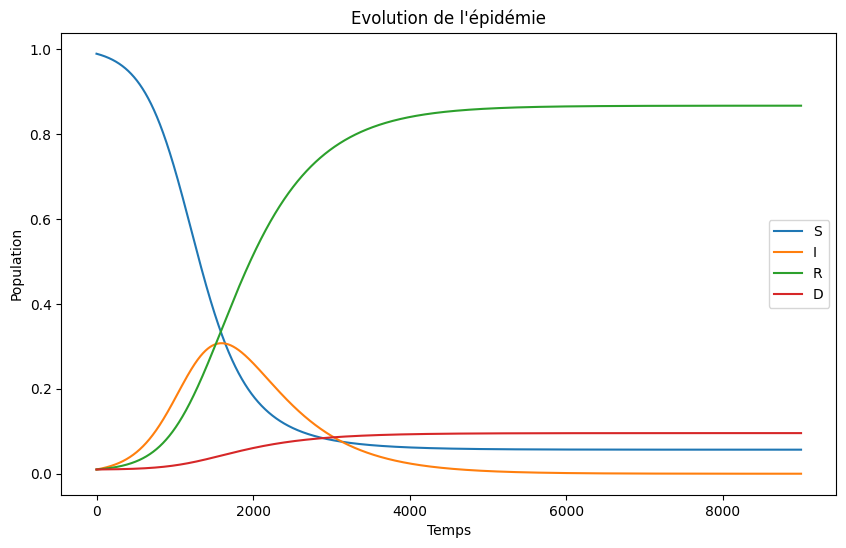

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(euler_S, label='S')
plt.plot(euler_I, label='I')
plt.plot(euler_R, label='R')
plt.plot(euler_D, label='D')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Evolution de l\'épidémie')
plt.legend()
plt.show()

Étape 3

In [14]:
data = pd.read_csv('sird_dataset.csv')

In [17]:
def mse(real_susceptible, real_ingected, real_recovered, real_dead, sim_susceptible, sim_ingected, sim_recovered, sim_dead):
  list_se_susceptible = []
  list_se_ingected = []
  list_se_recovered = []
  list_se_dead = []

  list_susceptuble = []
  list_ingected = []
  list_recovered = []
  list_dead = []

  for i in range(0,9000 , 100):
    list_susceptuble.append(np.array(sim_susceptible[i:i+100]).mean())
    list_ingected.append(np.array(sim_ingected[i:i+100]).mean())
    list_recovered.append(np.array(sim_recovered[i:i+100]).mean())
    list_dead.append(np.array(sim_dead[i:i+100]).mean())


    """list_susceptuble.append(round(statistics.mean(sim_susceptible[i:i+100]),6))
    list_ingected.append(round(statistics.mean(sim_ingected[i:i+100]),6))
    list_recovered.append(round(statistics.mean(sim_recovered[i:i+100]),6))
    list_dead.append(round(statistics.mean(sim_dead[i:i+100]),6))"""

  for i in range(0,len(real_susceptible)):
    se_susceptible = (real_susceptible[i] - list_susceptuble[i])**2
    se_ingected = (real_ingected[i] - list_ingected[i])**2
    se_recovered = (real_recovered[i] - list_recovered[i])**2
    se_dead = (real_dead[i] - list_dead[i])**2

    list_se_susceptible.append(se_susceptible)
    list_se_ingected.append(se_ingected)
    list_se_recovered.append(se_recovered)
    list_se_dead.append(se_dead)
  mse_susceptible = sum(list_se_susceptible)/len(list_se_susceptible) 
  mse_ingected = sum(list_se_ingected)/len(list_se_ingected) 
  mse_recovered = sum(list_se_recovered)/len(list_se_recovered) 
  mse_dead = sum(list_se_dead)/len(list_se_dead) 
  mse_ = (mse_susceptible + mse_ingected + mse_recovered + mse_dead)/4

  return mse_ , list_susceptuble, list_ingected, list_recovered, list_dead

In [18]:
def gride_search(data, param, S0, I0, R0, D0, h, T):
    param_values = param.values()
    combinations = list(itertools.product(*param_values))

    best_score = float('inf')  
    best_params = None

    best_susceptible, best_ingected, best_recovered, best_dead = None, None, None, None

    for combination in combinations:
        beta, gamma, mu = combination
        euler_S, euler_I, euler_R, euler_D = euler(beta, gamma, mu, S0, I0, R0, D0, h, T)
        mse_ , list_susceptuble, list_ingected, list_recovered, list_dead = mse(data['Susceptibles'], data['Infectés'], data['Rétablis'], data['Décès'], euler_S, euler_I, euler_R, euler_D)

        if mse_ < best_score:
            best_score = mse_
            best_params = combination
            best_susceptible, best_ingected, best_recovered, best_dead = list_susceptuble, list_ingected, list_recovered, list_dead

    return best_params , best_susceptible, best_ingected, best_recovered, best_dead

In [20]:
import numpy as np

param_grid = {
    "beta": list(np.linspace(0.25, 0.5, num=10)),
    "gamma": list(np.linspace(0.08, 0.15, num=10)),
    "mu": list(np.linspace(0.005, 0.015, num=10))
}

print(param_grid)

{'beta': [np.float64(0.25), np.float64(0.2777777777777778), np.float64(0.3055555555555556), np.float64(0.3333333333333333), np.float64(0.3611111111111111), np.float64(0.3888888888888889), np.float64(0.41666666666666663), np.float64(0.4444444444444444), np.float64(0.4722222222222222), np.float64(0.5)], 'gamma': [np.float64(0.08), np.float64(0.08777777777777777), np.float64(0.09555555555555556), np.float64(0.10333333333333333), np.float64(0.1111111111111111), np.float64(0.11888888888888888), np.float64(0.12666666666666665), np.float64(0.13444444444444442), np.float64(0.14222222222222222), np.float64(0.15)], 'mu': [np.float64(0.005), np.float64(0.0061111111111111106), np.float64(0.007222222222222222), np.float64(0.008333333333333333), np.float64(0.009444444444444443), np.float64(0.010555555555555554), np.float64(0.011666666666666665), np.float64(0.012777777777777777), np.float64(0.013888888888888888), np.float64(0.015)]}


In [21]:
best_params , best_susceptible, best_ingected, best_recovered, best_dead = gride_search(data,param_grid,0.99, 0.01, 0, 0, 0.01, 8999 )

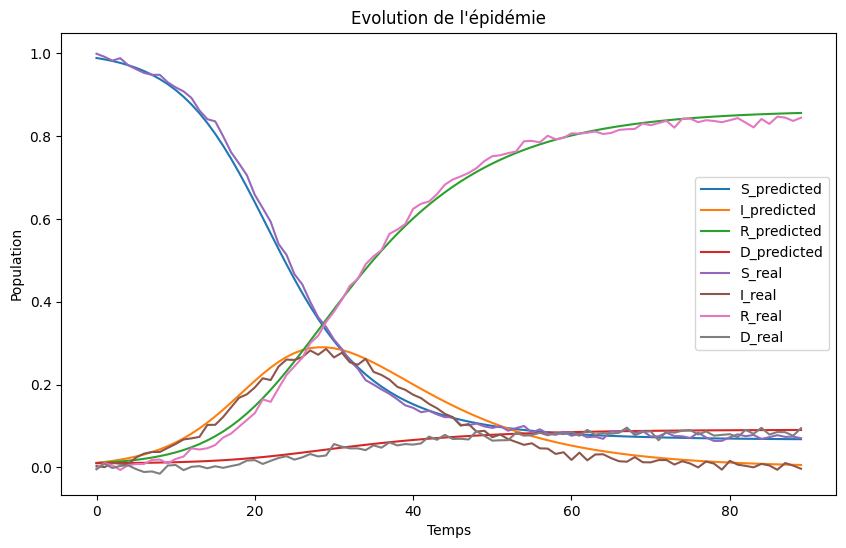

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(best_susceptible, label='S_predicted')
plt.plot(best_ingected, label='I_predicted')
plt.plot(best_recovered, label='R_predicted')
plt.plot(best_dead, label='D_predicted')
plt.plot(data['Susceptibles'], label='S_real')
plt.plot(data['Infectés'], label='I_real')
plt.plot(data['Rétablis'], label='R_real')
plt.plot(data['Décès'], label='D_real')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Evolution de l\'épidémie')
plt.legend()
plt.show()

Étape 4

Si R0 > 1 l’épidémie se propage.
Si R0 < 1 l’épidémie s’éteint naturellement.

Supposons que beta est égale a 0.2

In [26]:
euler_S, euler_I, euler_R, euler_D = euler(0.2, 0.15, 0.015, 0.99, 0.01, 0, 0, 0.01, 8999)

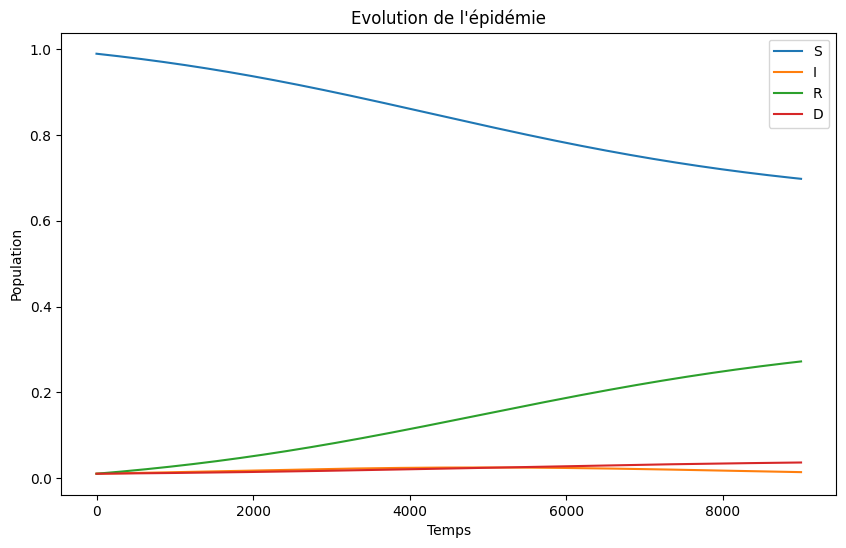

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(euler_S, label='S')
plt.plot(euler_I, label='I')
plt.plot(euler_R, label='R')
plt.plot(euler_D, label='D')
plt.xlabel('Temps')
plt.ylabel('Population')
plt.title('Evolution de l\'épidémie')
plt.legend()
plt.show()

On observe que la courbe des individus susceptibles diminue progressivement, tandis que celle des individus guéris augmente. Par ailleurs, les courbes des personnes infectées et décédées restent proches de zéro, indiquant une propagation limitée de l’infection.